# World Happiness Report — Exploratory Data Analysis

This notebook explores the World Happiness Report data in two parts:

- **Part A: Historical Dataset (2005–2023)**  
  Annual happiness data for up to 165 countries across 19 years.  
  Key columns: *Life Ladder* (happiness score), *Log GDP per capita*, *Social support*, *Healthy life expectancy*, and other well-being measures.

- **Part B: 2024 Snapshot**  
  Latest cross-sectional data for 143 countries.  
  Includes the *Regional indicator* column (10 world regions), which is not present in the historical dataset.

In [85]:
# === Setup ===
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dpp.data import load_from_kaggle


In [86]:
# Load dataset from Kaggle

dataset_link = "jainaru/world-happiness-report-2024-yearly-updated" # World Happiness Report 2024
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw/world-happiness-report-2024-yearly-updated' already exists with files. Skipping download (replace=False).


In [87]:
# Overview of loaded files
files

['World-happiness-report-2024.csv', 'World-happiness-report-updated_2024.csv']

In [88]:
# Load datasets into dataframes
df_all_years = pd.read_csv("/".join(["../data/raw/", dataset_name, files[1]]), encoding='latin1')
df_2024 = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))

print("Historical (2005–2023):", df_all_years.shape)
print("Snapshot (2024):", df_2024.shape)

Historical (2005–2023): (2363, 11)
Snapshot (2024): (143, 12)


# Part A: Historical Dataset (2005–2023)

In [89]:
# Preview structure
display(df_all_years.head())

# Column info
df_all_years.info()



,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


## A.2 Data Quality Checks (2005-2023)

Before analyzing trends, we first check for potential data quality issues:
- Dataset dimensions (rows × columns)  
- Duplicated rows or inconsistent entries  
- Country and year coverage (do we have all expected years per country?)  
- Unusual or impossible values (e.g., negative happiness scores, GDP log values)  

These checks help ensure we are working with clean, reliable data.

In [90]:
# Quality checks 
print(
    "Shape:\t",
    df_all_years.shape,
    "\nNumber of duplicated rows:\t",
    df_all_years.duplicated().sum(),
    "\nNumber of unique countries:\t", 
    df_all_years['Country name'].nunique(),
    "\nYear range:\t", 
    df_all_years['year'].min(), "-", df_all_years['year'].max()
)

# Coverage check: how many years per country
coverage = df_all_years.groupby("Country name")['year'].nunique().describe()
print("\nCoverage:\n", coverage)

pd.DataFrame(
    {
        "Data Types": df_all_years.dtypes,
        "Missing Values": df_all_years.isnull().sum(),
        "Unique Values": df_all_years.nunique(),
        "Sample Values": [df_all_years[col].sample(3).tolist() for col in df_all_years.columns]
    })

Shape:	 (2363, 11) 
Number of duplicated rows:	 0 
Number of unique countries:	 165 
Year range:	 2005 - 2023

Coverage:
 count    165.000000
mean      14.321212
std        4.798358
min        1.000000
25%       13.000000
50%       16.000000
75%       18.000000
max       18.000000
Name: year, dtype: float64


,Data Types,Missing Values,Unique Values,Sample Values
Country name,object,0,165,"[Denmark, Mauritania, Bahrain]"
year,int64,0,19,"[2010, 2014, 2020]"
Life Ladder,float64,0,1814,"[5.95, 4.441, 6.854]"
Log GDP per capita,float64,28,1760,"[7.879, 9.211, 9.787]"
Social support,float64,13,484,"[0.845, 0.958, 0.937]"
Healthy life expectancy at birth,float64,63,1126,"[66.58, 69.25, 70.4]"
Freedom to make life choices,float64,36,550,"[0.872, 0.707, 0.431]"
Generosity,float64,81,650,"[0.338, 0.159, 0.024]"
Perceptions of corruption,float64,125,613,"[0.801, 0.703, 0.853]"
Positive affect,float64,24,442,"[0.738, 0.737, 0.687]"


### Interpretation
- **Shape:** The dataset has 2363 rows and 11 columns.  
- **Duplicates:** 0 duplicated rows were found (expected = 0).  
- **Coverage:** On average, countries have data for ~14 years (out of max 19). Some countries have gaps (to be inspected in Section A.3 on missingness).    
- **Data types and structure:** All columns have expected data types (numeric vs categorical). Categorical fields like Country name are consistent. Some missing values are present but will be analyzed systematically in Section A.3 (Missingness).

In [91]:
# Summary statistics for numeric columns
display(df_all_years.describe().round(2))

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.00,2363.00,2335.00,2350.00,2300.00,2327.00,2282.00,2238.00,2339.00,2347.00
mean,2014.76,5.48,9.40,0.81,63.40,0.75,0.00,0.74,0.65,0.27
std,5.06,1.13,1.15,0.12,6.84,0.14,0.16,0.18,0.11,0.09
min,2005.00,1.28,5.53,0.23,6.72,0.23,-0.34,0.04,0.18,0.08
25%,2011.00,4.65,8.51,0.74,59.20,0.66,-0.11,0.69,0.57,0.21
50%,2015.00,5.45,9.50,0.83,65.10,0.77,-0.02,0.80,0.66,0.26
75%,2019.00,6.32,10.39,0.90,68.55,0.86,0.09,0.87,0.74,0.33
max,2023.00,8.02,11.68,0.99,74.60,0.98,0.70,0.98,0.88,0.70


### Interpretation
- **Life Ladder:** mean ~5.5, range ~1.3–8.0 → within expected bounds.  
- **Log GDP per capita:** mean ~9.4, range 5.5-11.7 -> corresponds to GDP per capita from <$300 to >$100,000, reasonable.  
- **Healthy life expectancy at birth:** Most values plausible (50–75 years), but the minimum ~6.7 is unrealistic and flagged for further inspection.
- **Generosity:** Ranges -0.34 to 0.70 -> negative values are expected due to standardization around zero.

Overall, distributions align with expectations. Apart from the flagged outlier in life expectancy, no critical data quality issues were found. We now proceed to a systematic missingness analysis.

## A.3 Missingness (2005-2023)

Understanding where and how much data is missing is critical before any analysis.  
We will:

1. Check overall missingness by column.  
2. Explore missingness patterns by year.  
3. Inspect missingness for key predictor columns by country.  

> Note: While *GDP, Social support, Health* are the cleanest key factors,  
> *Generosity* and *Perceptions of corruption* also show non-trivial missingness (~3–5%) and will be monitored in preprocessing.

In [92]:
# Missing values per column
missing_counts = df_all_years.isnull().sum().sort_values(ascending=False)
missing_percentage = (df_all_years.isnull().mean() * 100).sort_values(ascending=False)

pd.DataFrame({
    "Missing values": missing_counts,
    "Missing %": missing_percentage.round(2)
})


,Missing values,Missing %
Perceptions of corruption,125,5.29
Generosity,81,3.43
Healthy life expectancy at birth,63,2.67
Freedom to make life choices,36,1.52
Log GDP per capita,28,1.18
Positive affect,24,1.02
Negative affect,16,0.68
Social support,13,0.55
Country name,0,0.00
year,0,0.00


/var/folders/fh/8172dclx5cz0z2826zl214xc0000gn/T/ipykernel_16300/1591509542.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = df_all_years.groupby('year').apply(lambda g: g.isnull().mean())


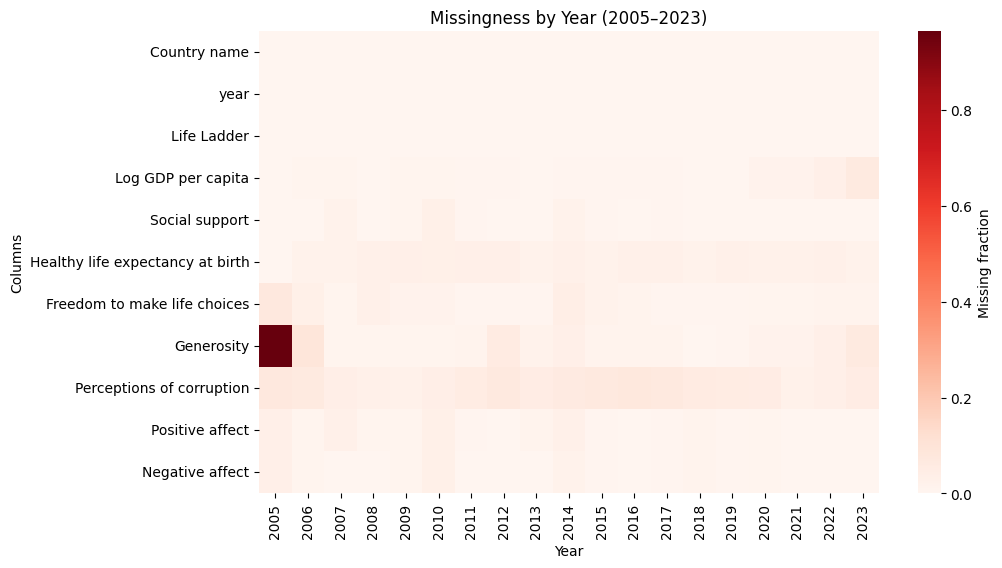

In [95]:
# Share of missing values per year
missing_by_year = df_all_years.groupby('year').apply(lambda g: g.isnull().mean())

plt.figure(figsize=(10,6))
sns.heatmap(missing_by_year.T, cmap="Reds", cbar_kws={"label": "Missing fraction"})
plt.title("Missingness by Year (2005–2023)")
plt.ylabel("Columns")
plt.xlabel("Year")
plt.show()

In [94]:
# Focus on key predictors
cols = ['Log GDP per capita','Social support','Healthy life expectancy at birth']

missing_frac_by_country = (
    df_all_years.groupby('Country name')[cols]
    .apply(lambda g: g.isnull().mean())   # fraction missing per column per country
    .mean(axis=1)                         # average across selected columns
    .sort_values(ascending=False)
)

missing_frac_by_country.head(20)


Country name
Somaliland region            0.666667
State of Palestine           0.375000
Taiwan Province of China     0.354167
Kosovo                       0.352941
Oman                         0.333333
South Sudan                  0.333333
Cuba                         0.333333
Hong Kong S.A.R. of China    0.333333
Qatar                        0.133333
Djibouti                     0.083333
Venezuela                    0.074074
Yemen                        0.047619
Afghanistan                  0.044444
Libya                        0.041667
Algeria                      0.030303
Bahrain                      0.027778
Kuwait                       0.025641
Morocco                      0.025641
Malta                        0.022222
Tunisia                      0.022222
dtype: float64

### Interpretation

- **By column:** Missingness is concentrated in a few variables, with *Perceptions of corruption* (~5%) and *Generosity* (~3%) most affected. Core outcome and predictors (*Life Ladder, GDP, Social support*) are >98% complete, which is reassuring.  

- **By year:** Coverage is weakest in early years (2005–2006), where Generosity data are almost entirely missing. From ~2010 onward, coverage stabilizes and missingness drops below 10% for all major variables.  

- **By country:** Missingness is clustered in specific cases such as Somaliland, Palestine, Taiwan, and Kosovo, reflecting political or data-availability issues. Most other countries have near-complete data.  


### Handling Strategy

- **By column:** Most variables have <5% missingness and can be retained with minimal handling. *Perceptions of corruption* has ~5.3% missing values which is slightly higher but still acceptable. Missing values will be handled case-by-case (e.g., selective imputation or exclusion).  

- **By year:** Years 2005–2006 show extreme gaps, especially for Genorisity data. For trend analyses, we will primarily focus on 2010–2023 where coverage is consistent.  

- **By country:** A few countries (e.g., Somaliland, Palestine, Kosovo) have substantial gaps (>30%). These will be flagged and may be excluded from comparative analyses, while retained in descriptive statistics where possible.   

Overall, missingness is **low and patterned**, not random. We will apply light-touch handling (e.g., selective exclusion, imputation if necessary) without major risk of biasing results.
We can proceed with confidence to deeper trend analyses.

## A.4 Time Trends (2005–2023)

### Data Coverage Over Time

Before interpreting trends, we validate whether observed fluctuations may be caused by changes in data coverage or composition across years. These checks help distinguish genuine global shifts from sampling artifacts.

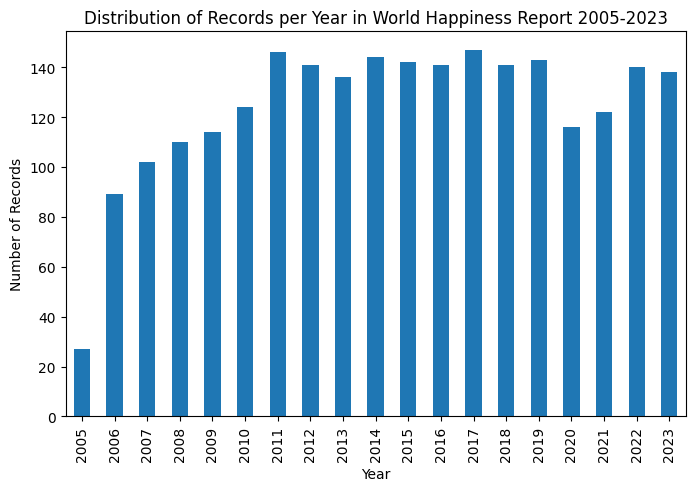

In [130]:
# Distribution of Records per Year
plt.figure(figsize=(8,5))
df_all_years['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Records per Year in World Happiness Report 2005-2023')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.show()

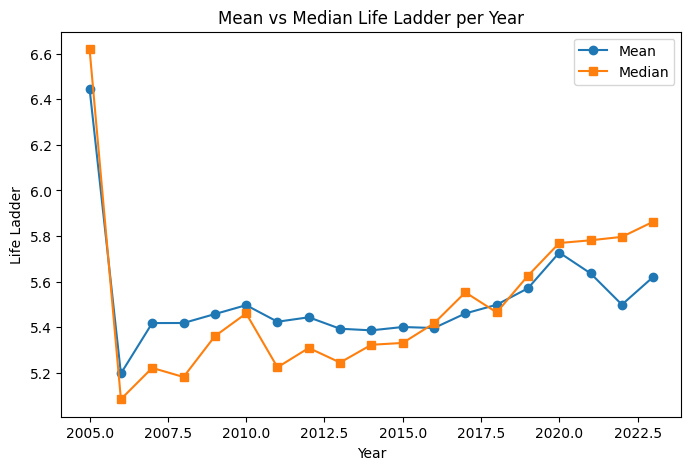

In [ ]:
# Mean vs Median Life Ladder per Year
life_ladder_summary = df_all_years.groupby('year')['Life Ladder'].agg(['mean','median'])
plt.figure(figsize=(8,5))
plt.plot(life_ladder_summary.index, life_ladder_summary['mean'], label='Mean', marker='o')
plt.plot(life_ladder_summary.index, life_ladder_summary['median'], label='Median', marker='s')
plt.title('Mean vs Median Life Ladder per Year')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend()
plt.show()


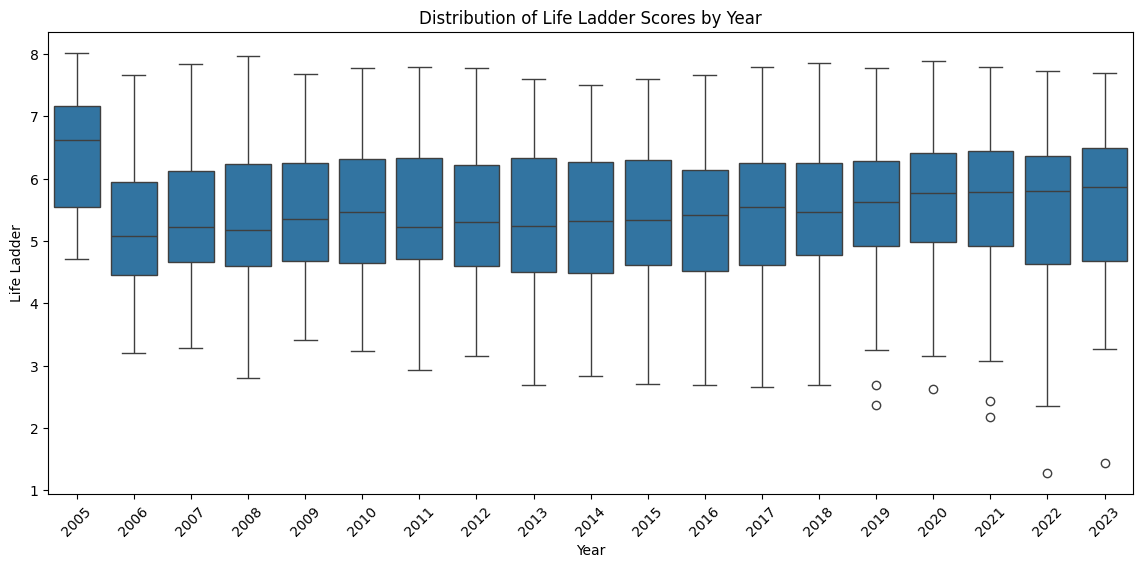

In [143]:
# Boxplot of Life Ladder per Year
plt.figure(figsize=(14,6))
sns.boxplot(data=df_all_years, x='year', y='Life Ladder')
plt.title('Distribution of Life Ladder Scores by Year')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.xticks(rotation=45)
plt.show()


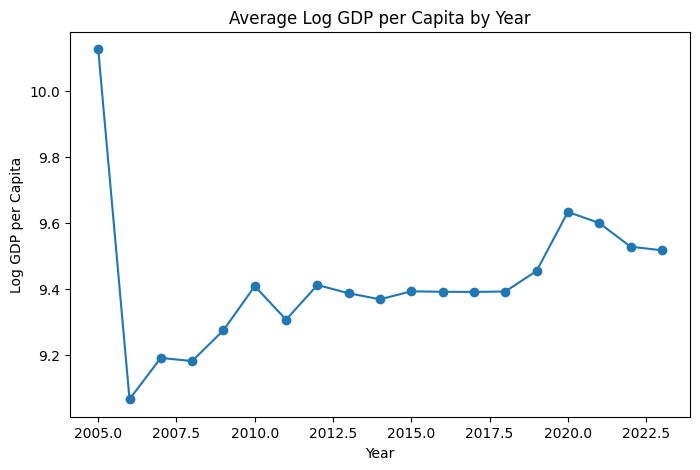

In [144]:
# Mean Log GDP per capita per Year
gdp_trend = df_all_years.groupby('year')['Log GDP per capita'].mean()
plt.figure(figsize=(8,5))
gdp_trend.plot(marker='o')
plt.title('Average Log GDP per Capita by Year')
plt.xlabel('Year')
plt.ylabel('Log GDP per Capita')
plt.show()


### Average Happiness Over Time
We first examine how global happiness (*Life Ladder*) evolved between 2005–2023.  
The shaded band represents ±1 standard deviation across countries, showing the degree of variation each year.

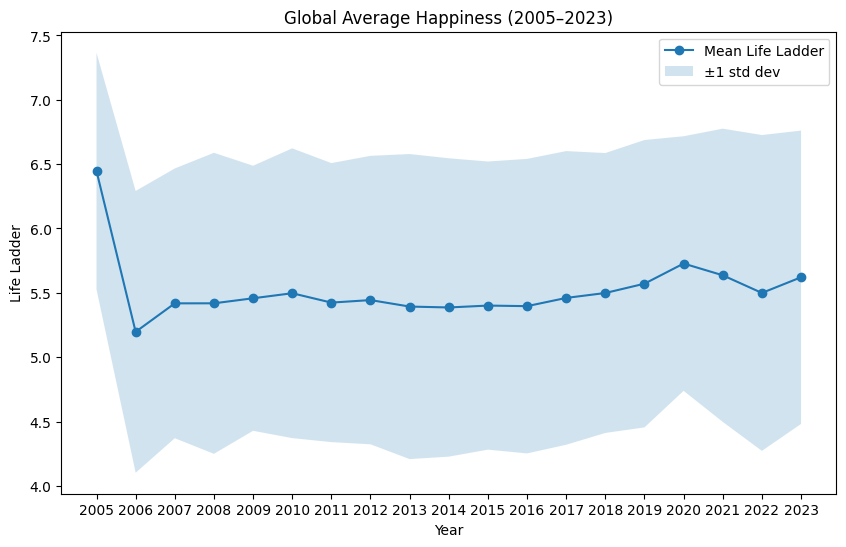

In [100]:
# Average Life Ladder by year
avg_life_ladder = df_all_years.groupby("year")["Life Ladder"].agg(["mean", "std"]).reset_index()
avg_life_ladder["year"] = avg_life_ladder["year"].astype(int)

plt.figure(figsize=(10, 6))
plt.plot(avg_life_ladder["year"], avg_life_ladder["mean"], marker="o", label="Mean Life Ladder")
plt.fill_between(
    avg_life_ladder["year"],
    avg_life_ladder["mean"] - avg_life_ladder["std"],
    avg_life_ladder["mean"] + avg_life_ladder["std"],
    alpha=0.2,
    label="±1 std dev"
)
plt.xticks(avg_life_ladder["year"])
plt.title("Global Average Happiness (2005–2023)")
plt.xlabel("Year")
plt.ylabel("Life Ladder")
plt.legend()
plt.show()


### Trends in Key Predictors
Next, we explore the global averages of the main predictors.  
To better account for differences in scale, we split the predictors into four plots:  
1. *Healthy life expectancy at birth* (60–70 years)  
2. *Log GDP per capita* (8–11, logarithmic units)  
3. *Social support, Freedom to make life choices, Perceptions of corruption* (0–1 scale)  
4. *Generosity* (-0.4-0.7 scale)

This separation allows us to see meaningful changes over time in each group without flattening smaller-scale variables.


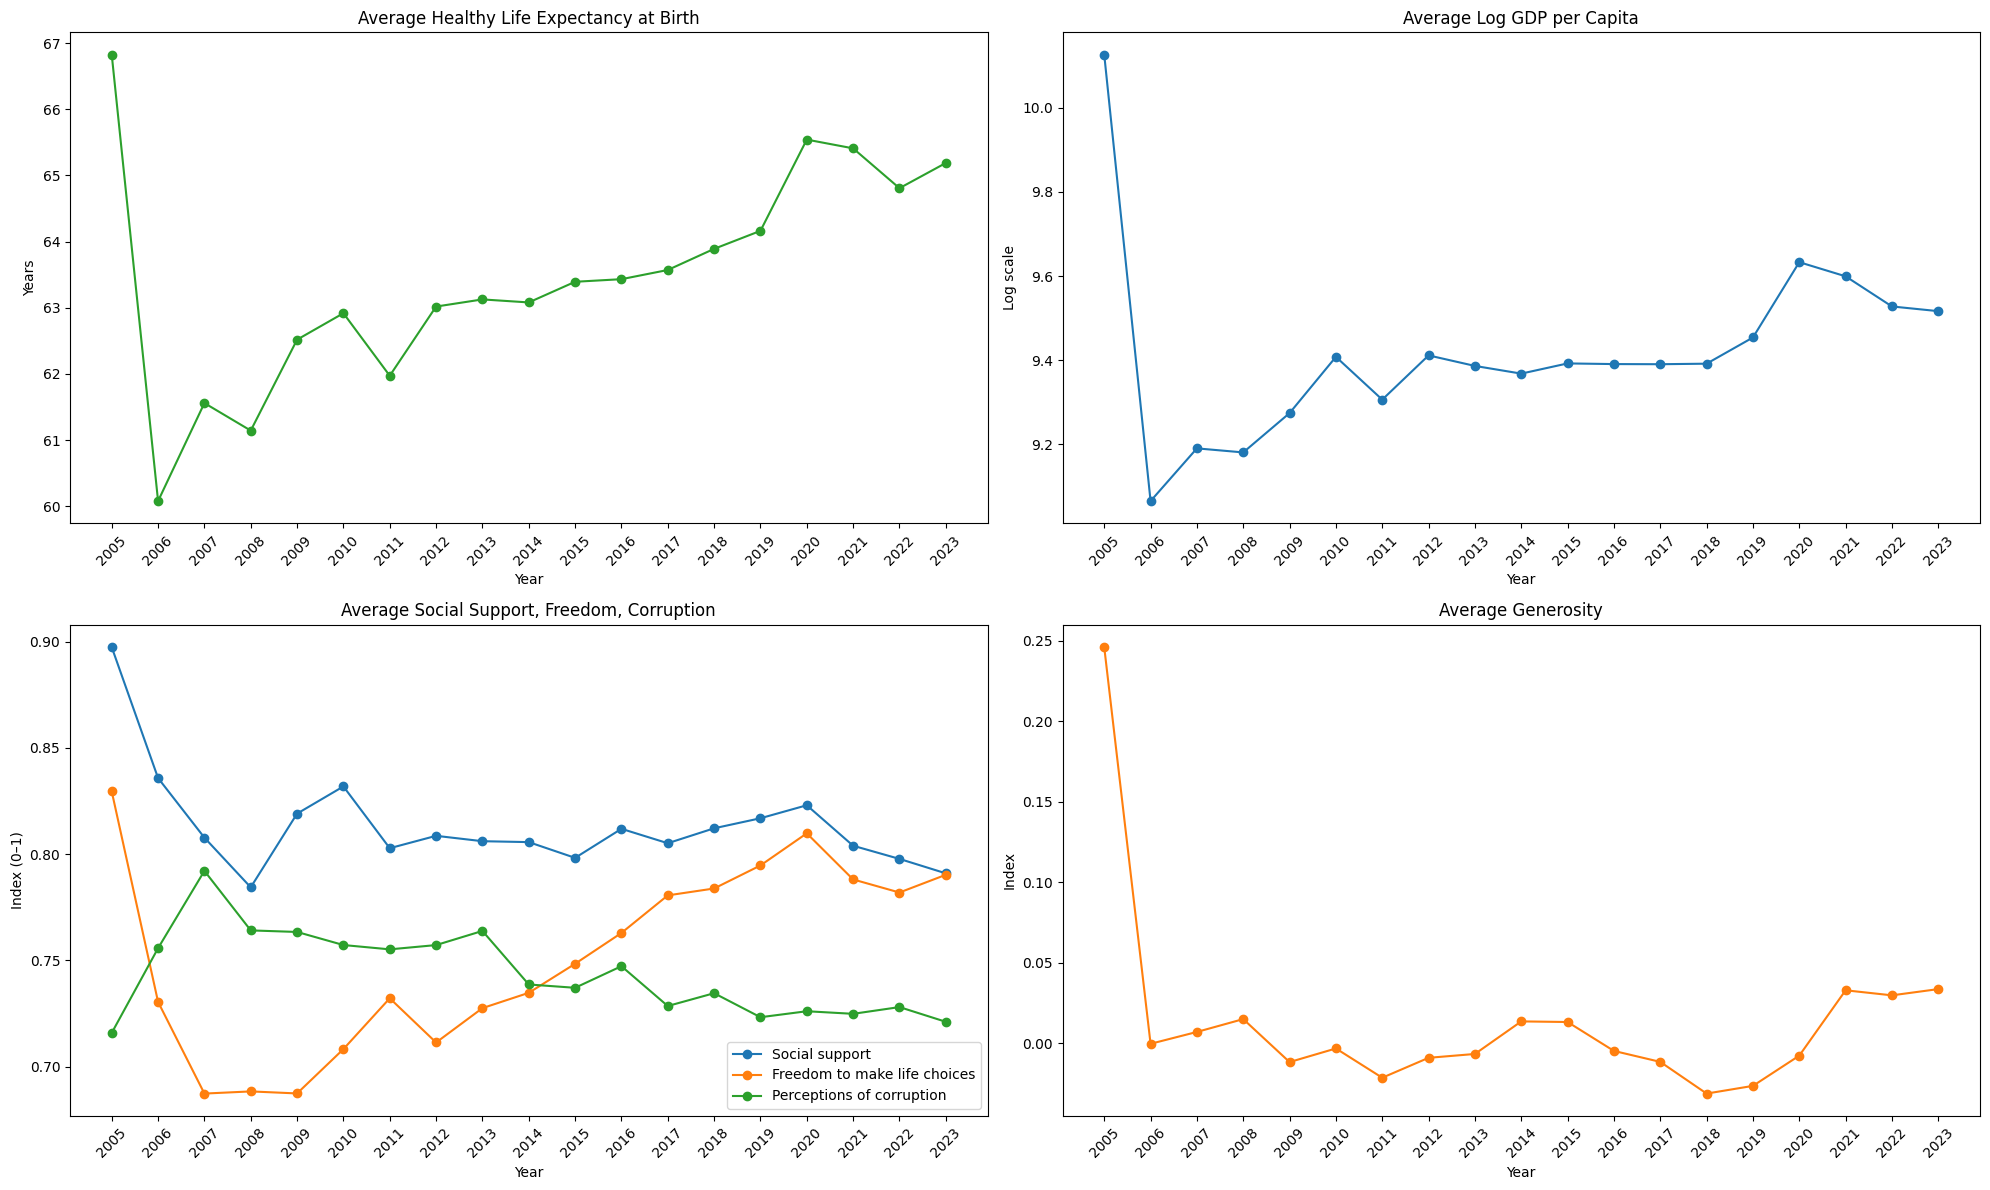

In [ ]:
# Create subplots for key predictors
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# 1. Healthy life expectancy
df_all_years.groupby("year")["Healthy life expectancy at birth"].mean().plot(
    ax=axes[0, 0], marker="o", color="tab:green"
)
axes[0, 0].set_title("Average Healthy Life Expectancy at Birth")
axes[0, 0].set_ylabel("Years")

# 2. Log GDP per capita
df_all_years.groupby("year")["Log GDP per capita"].mean().plot(
    ax=axes[0, 1], marker="o", color="tab:blue"
)
axes[0, 1].set_title("Average Log GDP per Capita")
axes[0, 1].set_ylabel("Log scale")

# 3. Social support, Freedom, Corruption
df_all_years.groupby("year")[["Social support", "Freedom to make life choices", "Perceptions of corruption"]].mean().plot(
    ax=axes[1, 0], marker="o"
)
axes[1, 0].set_title("Average Social Support, Freedom, Corruption")
axes[1, 0].set_ylabel("Index (0–1)")
axes[1, 0].legend(loc="lower right")

# 4. Generosity
df_all_years.groupby("year")["Generosity"].mean().plot(
    ax=axes[1, 1], marker="o", color="tab:orange"
)
axes[1, 1].set_title("Average Generosity")
axes[1, 1].set_ylabel("Index")

# Format x-axis (years as integers, every year shown)
for ax in axes.flat:
    ax.set_xlabel("Year")
    ax.set_xticks(sorted(df_all_years["year"].unique()))
    ax.set_xticklabels(sorted(df_all_years["year"].unique()), rotation=45)

plt.tight_layout()
plt.show()


In [117]:
# 1. Healthy life expectancy
display(df_all_years.groupby("year")["Healthy life expectancy at birth"].mean())

# 2. Log GDP per capita
display(df_all_years.groupby("year")["Log GDP per capita"].mean())

# 3. Social support, Freedom, Corruption
display(df_all_years.groupby("year")[["Social support", "Freedom to make life choices", "Perceptions of corruption"]].mean())

# 4. Generosity
display(df_all_years.groupby("year")["Generosity"].mean())


year
2005    66.825926
2006    60.077931
2007    61.559400
2008    61.143364
2009    62.518000
2010    62.917500
2011    61.972340
2012    63.018235
2013    63.126165
2014    63.080571
2015    63.392806
2016    63.432117
2017    63.570979
2018    63.890399
2019    64.162590
2020    65.541814
2021    65.409664
2022    64.807537
2023    65.188148
Name: Healthy life expectancy at birth, dtype: float64

year
2005    10.126000
2006     9.065545
2007     9.190743
2008     9.181136
2009     9.274558
2010     9.408154
2011     9.306497
2012     9.411607
2013     9.386574
2014     9.368301
2015     9.392539
2016     9.390986
2017     9.390644
2018     9.391915
2019     9.454161
2020     9.633035
2021     9.599442
2022     9.527844
2023     9.516690
Name: Log GDP per capita, dtype: float64

,Social support,Freedom to make life choices,Perceptions of corruption
year,,,
2005,0.897407,0.829520,0.715880
2006,0.835809,0.730477,0.755747
2007,0.807770,0.687337,0.792133
2008,0.784391,0.688355,0.764121
2009,0.819071,0.687402,0.763387
2010,0.831867,0.708262,0.757235
2011,0.802800,0.732186,0.755203
2012,0.808624,0.711371,0.757214
2013,0.806096,0.727548,0.763868


year
2005    0.246000
2006   -0.000383
2007    0.006980
2008    0.014954
2009   -0.011735
2010   -0.003285
2011   -0.021465
2012   -0.009090
2013   -0.006699
2014    0.013532
2015    0.013150
2016   -0.004813
2017   -0.011621
2018   -0.031305
2019   -0.026521
2020   -0.007737
2021    0.032850
2022    0.029719
2023    0.033597
Name: Generosity, dtype: float64

### Regional Time Trends (Placeholder)
Regional time trends will be explored once regions are mapped consistently in preprocessing.  
This will allow us to compare long-term happiness trajectories across world regions.

## Part B: 2024 Snapshot

In [63]:
# Preview structure
display(df_2024.head())

# Column info
df_2024.info()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [8]:
print('Data 2005-2023:')
display(
    "Shape",
    df_all_years.shape,
    "Description",
    df_all_years.describe().round(2),
    "Duplicates",
    df_all_years.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df_all_years.dtypes,
        "Missing Values": df_all_years.isnull().sum(),
        "Unique Values": df_all_years.nunique(),
        "Sample Values": [df_all_years[col].sample(3).tolist() for col in df_all_years.columns]
    })


Data 2005-2023:


'Shape'

(2363, 11)

'Description'

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.00,2363.00,2335.00,2350.00,2300.00,2327.00,2282.00,2238.00,2339.00,2347.00
mean,2014.76,5.48,9.40,0.81,63.40,0.75,0.00,0.74,0.65,0.27
std,5.06,1.13,1.15,0.12,6.84,0.14,0.16,0.18,0.11,0.09
min,2005.00,1.28,5.53,0.23,6.72,0.23,-0.34,0.04,0.18,0.08
25%,2011.00,4.65,8.51,0.74,59.20,0.66,-0.11,0.69,0.57,0.21
50%,2015.00,5.45,9.50,0.83,65.10,0.77,-0.02,0.80,0.66,0.26
75%,2019.00,6.32,10.39,0.90,68.55,0.86,0.09,0.87,0.74,0.33
max,2023.00,8.02,11.68,0.99,74.60,0.98,0.70,0.98,0.88,0.70


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Country name,object,0,165,"[Iran, Denmark, Taiwan Province of China]"
year,int64,0,19,"[2014, 2012, 2005]"
Life Ladder,float64,0,1814,"[4.313, 5.325, 5.125]"
Log GDP per capita,float64,28,1760,"[10.041, 8.123, 10.385]"
Social support,float64,13,484,"[0.753, 0.825, 0.812]"
Healthy life expectancy at birth,float64,63,1126,"[62.44, 63.85, 63.875]"
Freedom to make life choices,float64,36,550,"[0.792, 0.851, 0.738]"
Generosity,float64,81,650,"[0.082, 0.064, -0.054]"
Perceptions of corruption,float64,125,613,"[0.775, nan, 0.829]"
Positive affect,float64,24,442,"[0.496, 0.689, 0.436]"


Insights:
- High count of missing values in columns: Perceptions of corruption, Generosity, Healthy life expectancy at birth
- No missing values in column "Life Ladder" -> excellent, since this will be the target variable
- Columns "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect" are of low importance (low correlation with target variable), decision to just keep those missing values
- Columns "Log GDP per capita", "Social support", "Healthy life expectancy at birth" are of high importance. Those missing values will be handled with interpolation to ensure high quality of further analysis. The World Happiness Report mentiones that the method of inter- and extrapolation was also used to fill missing values of these columns in the 2024 report.

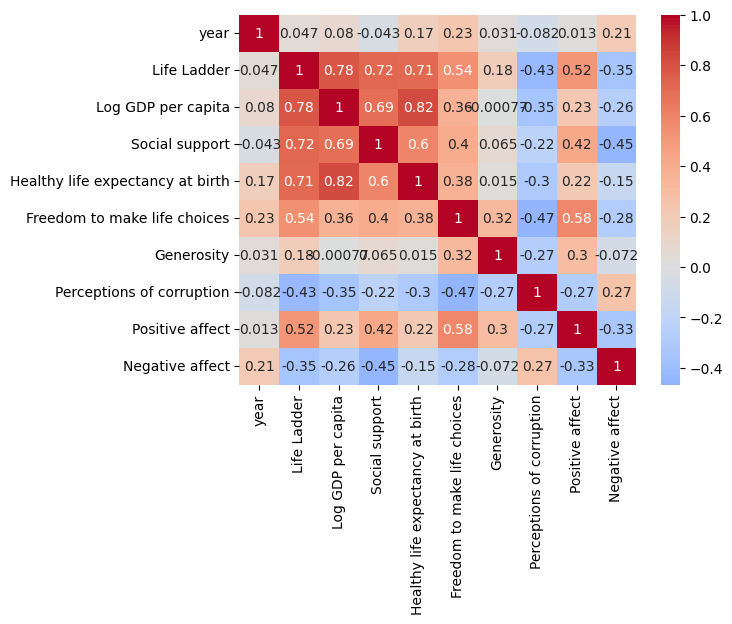

In [9]:
sns.heatmap(df_all_years.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0);

Distribution of Numerical Features:


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Life Ladder'}>,
        <Axes: title={'center': 'Log GDP per capita'}>],
       [<Axes: title={'center': 'Social support'}>,
        <Axes: title={'center': 'Healthy life expectancy at birth'}>,
        <Axes: title={'center': 'Freedom to make life choices'}>],
       [<Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>,
        <Axes: title={'center': 'Positive affect'}>],
       [<Axes: title={'center': 'Negative affect'}>, <Axes: >, <Axes: >]],
      dtype=object)

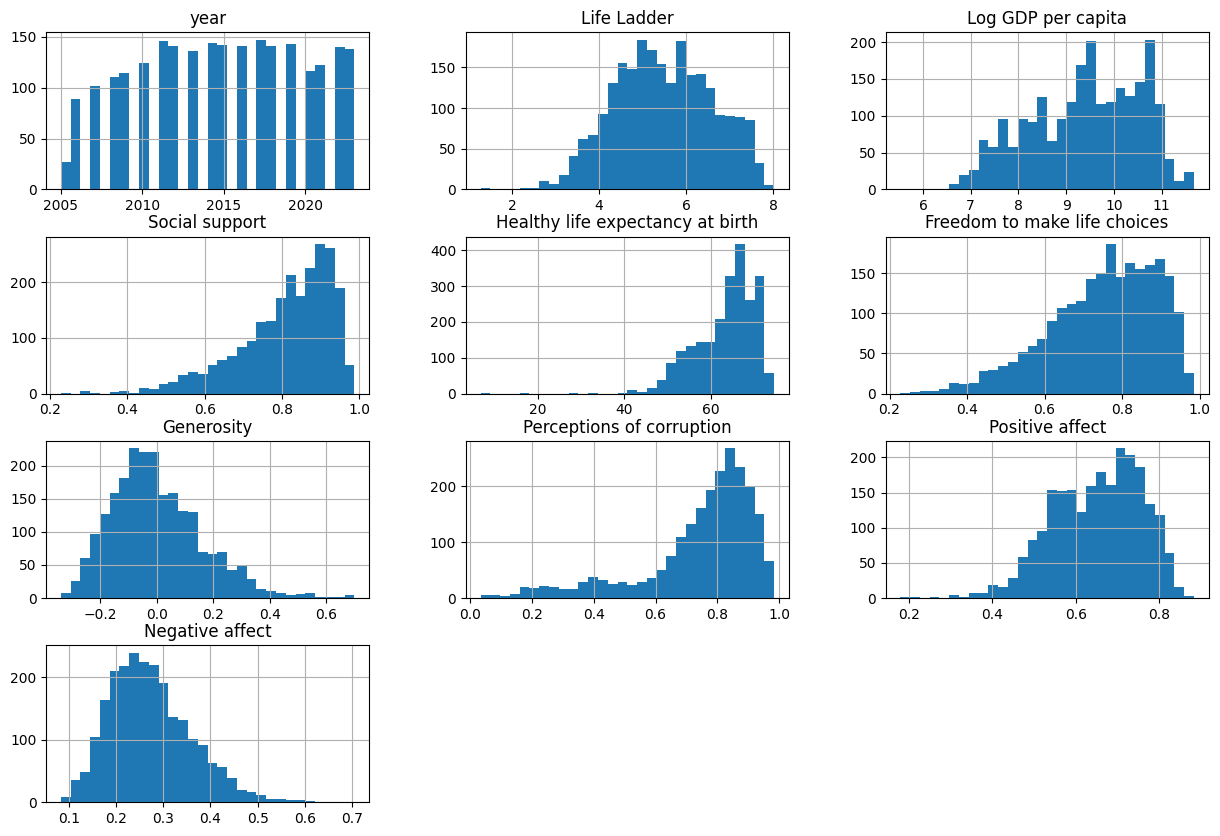

In [13]:
print('Distribution of Numerical Features:')
df_all_years.hist(figsize=(15, 10), bins=30)

Exploration: Current Data 2024

In [10]:
df_2024 = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
print('Data 2024:')
display(df_2024.head())

Data 2024:


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [11]:
print('Data 2024:')
display(
    "Shape",
    df_2024.shape,
    "Description",
    df_2024.describe().round(2),
    "Duplicates",
    df_2024.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df_2024.dtypes,
        "Missing Values": df_2024.isnull().sum(),
        "Unique Values": df_2024.nunique(),
        "Sample Values": [df_2024[col].sample(3).tolist() for col in df_2024.columns]
    })


Data 2024:


'Shape'

(143, 12)

'Description'

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.00,143.00,143.00,140.00,140.00,140.00,140.00,140.00,140.00,140.00
mean,5.53,5.64,5.41,1.38,1.13,0.52,0.62,0.15,0.15,1.58
std,1.17,1.16,1.19,0.43,0.33,0.16,0.16,0.07,0.13,0.54
min,1.72,1.78,1.67,0.00,0.00,0.00,0.00,0.00,0.00,-0.07
25%,4.73,4.85,4.61,1.08,0.92,0.40,0.53,0.09,0.07,1.31
50%,5.78,5.90,5.67,1.43,1.24,0.55,0.64,0.14,0.12,1.64
75%,6.42,6.51,6.32,1.74,1.38,0.65,0.74,0.19,0.19,1.88
max,7.74,7.82,7.67,2.14,1.62,0.86,0.86,0.40,0.57,3.00


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Country name,object,0,143,"[New Zealand, Comoros, Montenegro]"
Regional indicator,object,0,10,"[Latin America and Caribbean, Sub-Saharan Afri..."
Ladder score,float64,0,140,"[6.188, 6.523, 5.959]"
upperwhisker,float64,0,140,"[7.051, 4.123, 4.446]"
lowerwhisker,float64,0,136,"[3.985, 4.313, 5.466]"
Log GDP per capita,float64,3,134,"[1.517, 1.361, 1.7]"
Social support,float64,3,124,"[1.381, 0.969, 1.277]"
Healthy life expectancy,float64,3,119,"[0.718, 0.262, 0.708]"
Freedom to make life choices,float64,3,122,"[0.827, 0.709, 0.816]"
Generosity,float64,3,110,"[0.144, 0.145, 0.175]"


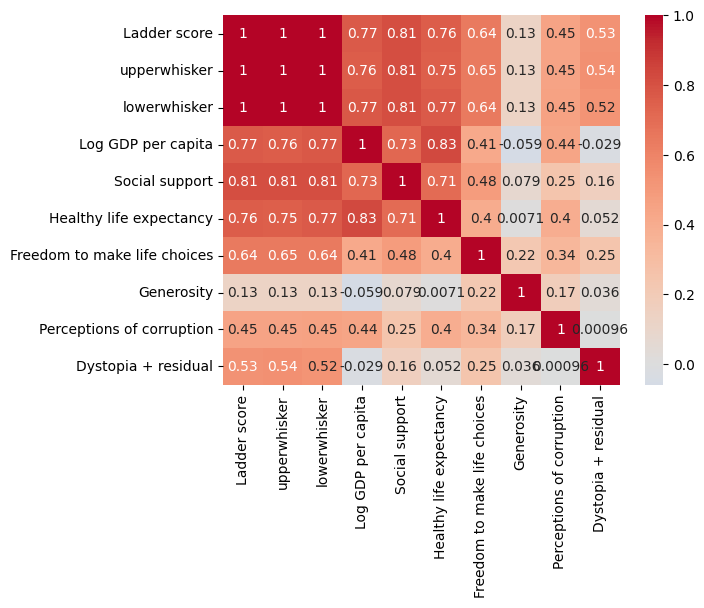

In [12]:
sns.heatmap(df_2024.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0);

Distribution of Numerical Features:


array([[<Axes: title={'center': 'Ladder score'}>,
        <Axes: title={'center': 'upperwhisker'}>,
        <Axes: title={'center': 'lowerwhisker'}>],
       [<Axes: title={'center': 'Log GDP per capita'}>,
        <Axes: title={'center': 'Social support'}>,
        <Axes: title={'center': 'Healthy life expectancy'}>],
       [<Axes: title={'center': 'Freedom to make life choices'}>,
        <Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>],
       [<Axes: title={'center': 'Dystopia + residual'}>, <Axes: >,
        <Axes: >]], dtype=object)

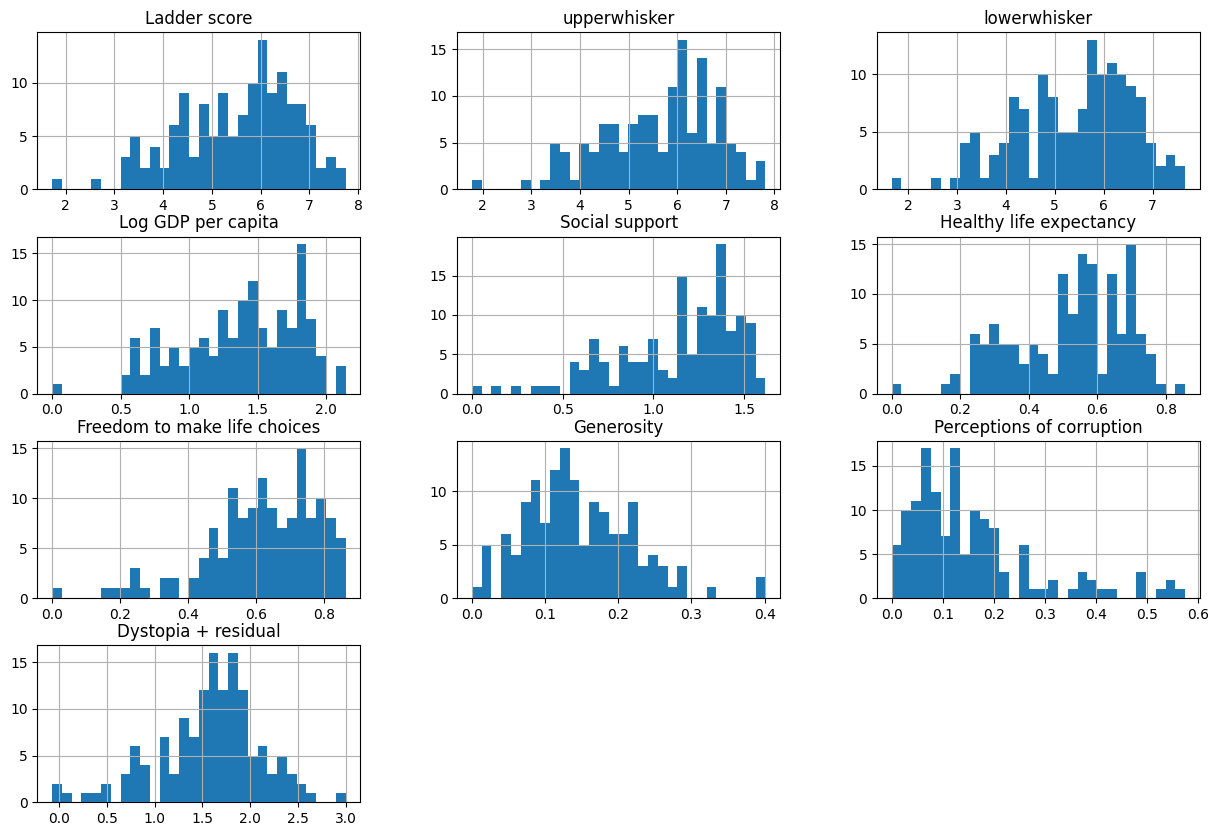

In [49]:
# Distribution of Numerical columns

print('Distribution of Numerical Features:')
df_2024.hist(figsize=(15, 10), bins=30)

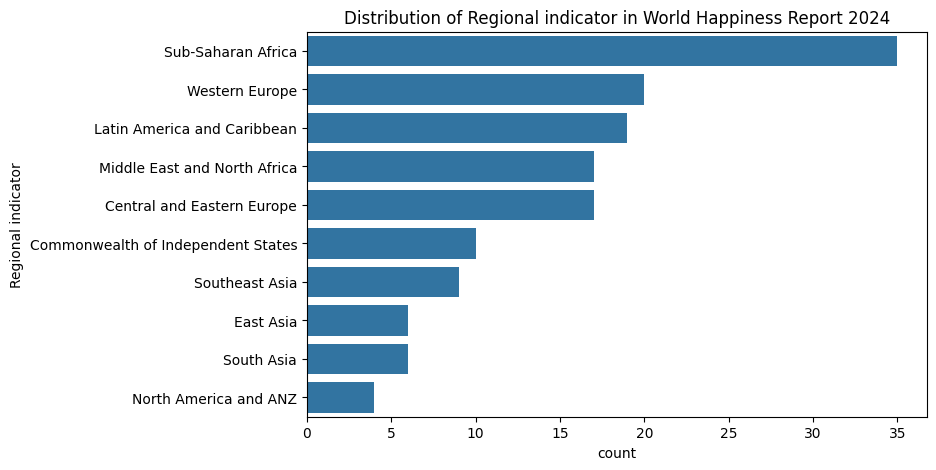

In [42]:
# Distribution of Regional indicator

plt.figure(figsize=(8,5))
order = df_2024['Regional indicator'].value_counts().index
sns.countplot(y=df_2024['Regional indicator'], order=order)
plt.title('Distribution of Regional indicator in World Happiness Report 2024')
plt.show()


In [57]:
# Regional indicator statistics
df_2024.groupby('Regional indicator')['Ladder score'].agg(['count','mean','std']).sort_values('mean', ascending=False)


,count,mean,std
Regional indicator,,,
North America and ANZ,4,6.927750,0.151476
Western Europe,20,6.841650,0.538030
Central and Eastern Europe,17,6.170941,0.494803
Latin America and Caribbean,19,6.143368,0.376936
East Asia,6,5.934333,0.398773
Southeast Asia,9,5.551889,0.779519
Commonwealth of Independent States,10,5.538500,0.480649
Middle East and North Africa,17,5.199941,1.260354
Sub-Saharan Africa,35,4.329686,0.704075


## Initial Findings

- Both datasets (2005–2023 and 2024) contain happiness scores ("Ladder score") and several explanatory variables such as GDP, social support, and health.
- The datasets differ slightly in structure:
  - 2005–2023: yearly panel data, no regional indicator included.
  - 2024: single year, includes a regional indicator, some variable definitions slightly differ (e.g., perceptions of corruption).
- Missing values are present in both datasets, especially in 2024 for health, social support, and corruption perception.
- No duplicate entries were detected.
- Key correlations (consistent across datasets):
  - Ladder score strongly correlates with Log GDP per capita, Social support, and Healthy life expectancy.
  - Perceptions of corruption correlates with ladder score, but the sign of correlation differs between 2005–2023 and 2024, likely due to different variable scaling/definitions.
  - Generosity shows weak correlation with ladder score in both datasets.
- The 2024 dataset introduces explicit regional grouping, which supports comparative regional analyses and systematic testing of regional differences.

### Preliminary Assumptions
- Economic factors (GDP), social support, and health are the strongest predictors of happiness.
- The role of corruption perception needs clarification due to potential differences in definition/scaling.
- Generosity may not be a strong explanatory factor for happiness.
- Differences in definitions across datasets must be clarified before merging or comparing results.
- The inclusion of regional indicators in 2024 opens up the possibility of analyzing systematic regional differences in happiness levels.

These initial findings motivate the next step of systematically preprocessing the datasets (handling missing values, clarifying definitions, and preparing variables) before deeper analysis and hypothesis testing.